In [1]:
import h5py as h5
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, gridspec
from matplotlib.colors import ListedColormap
from matplotlib.transforms import Bbox
from mpl_toolkits.axes_grid1 import make_axes_locatable, ImageGrid
%load_ext autoreload
%autoreload 2

# Some plotting utilities

In [2]:
import matplotlib.colors as colors

class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

class MidpointSymLogNorm(colors.SymLogNorm):
    def __init__(self, linthresh, linscale=None, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.SymLogNorm.__init__(self, linthresh=linthresh, linscale=linscale, vmin=vmin, vmax=vmax, clip=clip)    
    
    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

In [3]:
Ndots=2**13
stretch_bottom=6.
stretch_top=1/2.5
truncate_bottom=0.35

bottom = cm.get_cmap('BuGn_r', Ndots)
top = cm.get_cmap('RdPu', Ndots)

interp_top=np.linspace(0, 1, Ndots)**stretch_top
interp_bottom=np.linspace(truncate_bottom, 1, Ndots)**stretch_bottom
newcolors = np.vstack((bottom(interp_bottom),
                       top(interp_top)))
GradientMap = ListedColormap(newcolors, name='GradientMap')

In [4]:
Ndots=2**15
stretch_top=0.7
stretch_bottom=0.5
top = cm.get_cmap('BrBG', Ndots)
bottom = cm.get_cmap('BrBG', Ndots)

interp_top=np.linspace(0., 1., Ndots)**stretch_top+0.5
interp_bottom=np.linspace(0., 1., Ndots)**stretch_bottom-0.5
newcolors = np.vstack((bottom(interp_bottom),
                       top(interp_top)))

CovarianceMap = ListedColormap(newcolors, name='CovarianceMap')

In [5]:
top = cm.get_cmap('Reds_r', 128)
bottom = cm.get_cmap('Blues', 128)

newcolors = np.vstack((top(np.linspace(0.7, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))
Blues_Reds = ListedColormap(newcolors, name='Blues_Reds')

top = cm.get_cmap('Oranges_r', 128)
bottom = cm.get_cmap('Purples', 128)

newcolors = np.vstack((top(np.linspace(0.7, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))
Purples_Oranges = ListedColormap(newcolors, name='Purples_Oranges')

In [6]:
nContourLevels=3
def get_contours(Z, nBins, confLevels=(.3173, .0455, .0027)):
    Z /= Z.sum()
    nContourLevels = len(confLevels)
    chainLevels = np.ones(nContourLevels+1)
    histOrdered = np.sort(Z.flat)
    histCumulative = np.cumsum(histOrdered)
    nBinsFlat = np.linspace(0., nBins**2, nBins**2)

    for l in range(nContourLevels):
        # Find location of contour level in 1d histCumulative
        temp = np.interp(confLevels[l], histCumulative, nBinsFlat)
        # Find "height" of contour level
        chainLevels[nContourLevels-1-l] = np.interp(temp, nBinsFlat, histOrdered)
        
    return chainLevels

In [7]:
plt.rcParams.update({'lines.linewidth': 2})
plt.rcParams.update({'text.usetex': True})
plt.rcParams.update({'text.latex.preamble': r"\usepackage{amsmath,amsfonts,amssymb,amsthm} \usepackage{upgreek}"})
plt.rcParams.update({'font.family': 'serif'})

# Run pySELFI

In [8]:
# We first import the configuration
from lotkavolterra_simulator import LVsimulator, LVobserver
from model.setup_LV import *

In [9]:
%%capture
# We then perform all calculations
# run_simulations() will load from existing pools or perform all the necessary blackbox evaluations
selfi_LV_modelA.compute_prior()
selfi_LV_modelA.save_prior()
selfi_LV_modelA.run_simulations() 
selfi_LV_modelA.compute_likelihood()
selfi_LV_modelA.save_likelihood()
selfi_LV_modelA.compute_posterior()
selfi_LV_modelA.save_posterior()

selfi_LV_modelB.compute_prior()
selfi_LV_modelB.save_prior()
selfi_LV_modelB.run_simulations() 
selfi_LV_modelB.compute_likelihood()
selfi_LV_modelB.save_likelihood()
selfi_LV_modelB.compute_posterior()
selfi_LV_modelB.save_posterior()

# Theory, signal, and data

In [10]:
Xefficiency=threshold*X_efficiency(t)

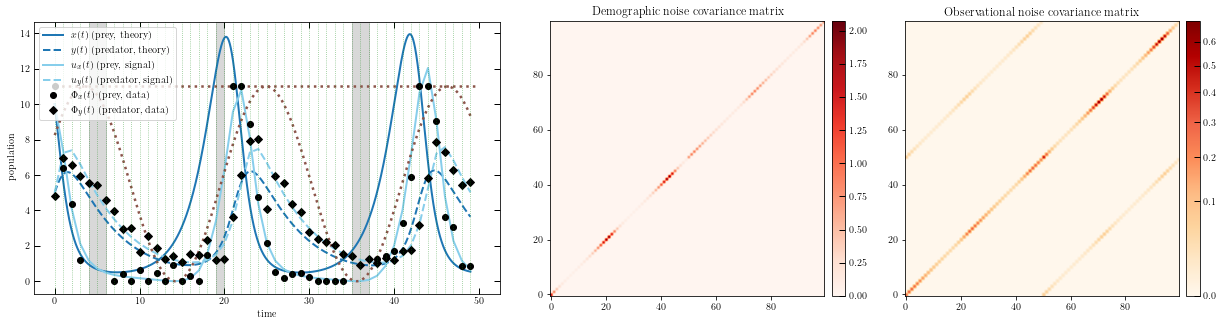

In [11]:
fig = plt.figure(figsize=(18,5))

gs0 = gridspec.GridSpec(1,3, width_ratios=[1.5,0.5,0.5], height_ratios=[1.], wspace=1.)
gs0.update(right=1.,left=0.)
ax0 = plt.subplot(gs0[0])
gs1 = gridspec.GridSpec(1,3)
gs1.update(top=1.,bottom=0.)
ax1 = plt.subplot(gs1[1])
ax2 = plt.subplot(gs1[2])

# Plot the theory, signal, and data
ax0.xaxis.set_ticks_position('both')
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0.xaxis.set_tick_params(which='major', length=6)
ax0.xaxis.set_tick_params(which='minor', length=4)
ax0.yaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0.yaxis.set_tick_params(which='major', length=6)
ax0.plot(t,Xtheory,ls="-",color="C0",label="$x(t)$ (prey, theory)")
ax0.plot(t,Ytheory,ls="--",color="C0",label="$y(t)$ (predator, theory)")
ax0.plot(t_s,Xtsignal,ls="-",color="skyblue",label="$u_x(t)$ (prey, signal)")
ax0.plot(t_s,Ytsignal,ls="--",color="skyblue",label="$u_y(t)$ (predator, signal)")
ax0.plot(t,Xefficiency,ls=':',lw=2.5,color="C5")
ax0.plot([0,S//2],[threshold,threshold],ls=':',lw=2.5,color="C5")
ax0.plot(Xobs,Xdata,marker="o",ls="",color="black",label="$\Phi_x(t)$ (prey, data)")
ax0.plot(Yobs,Ydata,marker="D",ls="",color="black",label="$\Phi_y(t)$ (predator, data)")
ax0.set_xlabel("time")
ax0.set_ylabel("population")
(ymin,ymax)=(ymin_ref,ymax_ref)=ax0.get_ylim()
ax0.set_ylim([ymin,ymax])
for i in range(len(t_s)):
    ax0.plot([t_s[i],t_s[i]],[ymin,ymax],linestyle=':',linewidth=0.8,color='green',alpha=0.5)
for i in range(len(masks)):
    ax0.fill_between(masks[i],np.ones_like(masks[i])*ymin,np.ones_like(masks[i])*ymax,color="C7",alpha=0.3)
ax0.legend(loc="upper left")

# Plot the noise covariance matrix
divider = make_axes_locatable(ax1)
ax1_cb = divider.new_horizontal(size="5%", pad=0.10)
im1 = ax1.imshow(Dtsignal,origin="lower",cmap="Reds")
ax1.set_title("Demographic noise covariance matrix")
fig.add_axes(ax1_cb)
cbar1 = fig.colorbar(im1, cax=ax1_cb)
cbar1.ax.tick_params(axis='y', direction='in', width=1.0, length=6)

divider = make_axes_locatable(ax2)
ax2_cb = divider.new_horizontal(size="5%", pad=0.10)
im2 = ax2.imshow(Otsignal,origin="lower",cmap="OrRd", norm=colors.PowerNorm(gamma=0.55))
ax2.set_title("Observational noise covariance matrix")
fig.add_axes(ax2_cb)
cbar2 = fig.colorbar(im2, cax=ax2_cb)
cbar2.ax.tick_params(axis='y', direction='in', width=1.0, length=6)

plt.show()

In [12]:
np.savez("plots/model",t=t,t_s=t_s,S=S,Xtheory=Xtheory,Ytheory=Ytheory,threshold=threshold,Xtsignal=Xtsignal,Ytsignal=Ytsignal,
         Dtsignal=Dtsignal,Otsignal=Otsignal,Xobs=Xobs,Xdata=Xdata,Yobs=Yobs,Ydata=Ydata,Xefficiency=Xefficiency,masks=np.array(masks, dtype=object))

# Prior and expansion point

In [13]:
sigma_t=np.sqrt(np.diag(selfi_LV_modelA.prior.covariance))
SS = selfi_LV_modelA.prior.covariance

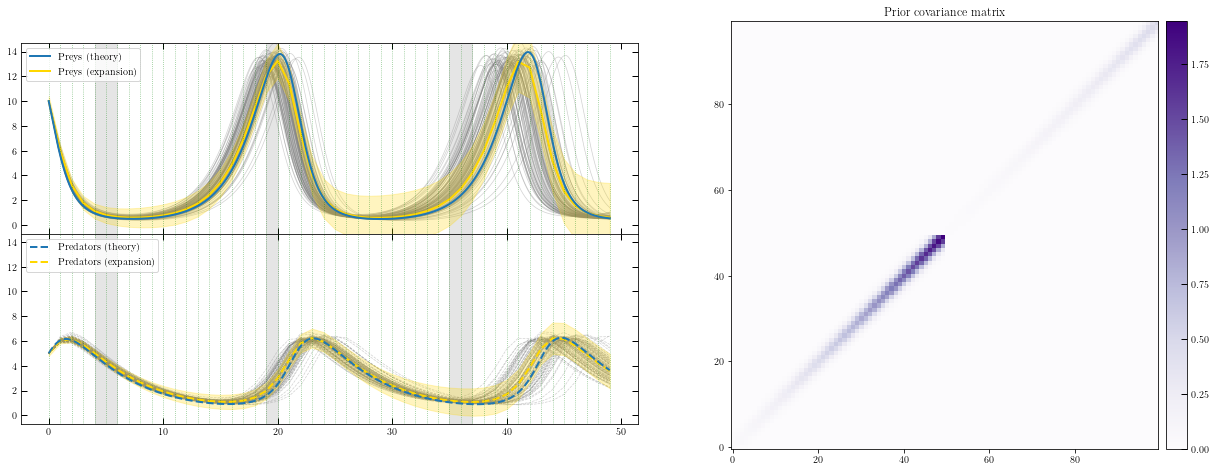

In [14]:
fig = plt.figure(figsize=(18,7))

gs0 = gridspec.GridSpec(2,2, width_ratios=[1.,1.], height_ratios=[1.,1.], wspace=0.1, hspace=0.)
gs0.update(right=1.,left=0.)
ax0 = plt.subplot(gs0[0,0])
ax0b = plt.subplot(gs0[1,0], sharex=ax0)

gs1 = gridspec.GridSpec(2,2)
gs1.update(top=2.2,bottom=0.)
ax1 = plt.subplot(gs1[-1,1])

# Plot the expansion function and the prior uncertainty
ax0.xaxis.set_ticks_position('both')
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0.xaxis.set_tick_params(which='major', length=6)
ax0.xaxis.set_tick_params(which='minor', length=4)
ax0.yaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0.yaxis.set_tick_params(which='major', length=6)
for n in range(Nfid):
    ax0.plot(t,Xthfid[n],ls="-",color="C7",alpha=0.35,linewidth=0.7,zorder=0.5)
ax0.plot(t,Xtheory,ls="-",color="C0",label="Preys (theory)",zorder=3)
ax0.plot(t_s,Xexp,ls="-",color="gold",label="Preys (expansion)",zorder=2)
ax0.fill_between(t_s,Xexp-2*sigma_t[0:S//2],Xexp+2*sigma_t[0:S//2],color="gold",alpha=0.25,zorder=2)
(ymin,ymax)=(ymin_ref,ymax_ref)
ax0.set_ylim([ymin,ymax])
for i in range(len(t_s)):
    ax0.plot([t_s[i],t_s[i]],[ymin,ymax],linestyle=':',linewidth=0.8,color='green',alpha=0.5)
for i in range(len(masks)):
    ax0.fill_between(masks[i],np.ones_like(masks[i])*ymin,np.ones_like(masks[i])*ymax,color="C7",alpha=0.2)
ax0.legend(loc="upper left")

ax0b.xaxis.set_ticks_position('both')
ax0b.yaxis.set_ticks_position('both')
ax0b.xaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0b.xaxis.set_tick_params(which='major', length=6)
ax0b.xaxis.set_tick_params(which='minor', length=4)
ax0b.yaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0b.yaxis.set_tick_params(which='major', length=6)
for n in range(Nfid):
    ax0b.plot(t_s,Yfid[n],ls="--",color="C7",alpha=0.35,linewidth=0.7,zorder=0.5)
ax0b.plot(t,Ytheory,ls="--",color="C0",label="Predators (theory)",zorder=3)
ax0b.plot(t_s,Yexp,ls="--",color="gold",label="Predators (expansion)",zorder=2)
ax0b.fill_between(t_s,Yexp-2*sigma_t[S//2:S],Yexp+2*sigma_t[S//2:S],color="gold",alpha=0.25,zorder=2)
(ymin,ymax)=(ymin_ref,ymax_ref)
ax0b.set_ylim([ymin,ymax])
for i in range(len(t_s)):
    ax0b.plot([t_s[i],t_s[i]],[ymin,ymax],linestyle=':',linewidth=0.8,color='green',alpha=0.5)
for i in range(len(masks)):
    ax0b.fill_between(masks[i],np.ones_like(masks[i])*ymin,np.ones_like(masks[i])*ymax,color="C7",alpha=0.2)
ax0b.legend(loc="upper left")

# Plot the prior covariance matrix
divider = make_axes_locatable(ax1)
ax1_cb = divider.new_horizontal(size="5%", pad=0.10)
im1 = ax1.imshow(SS,origin="lower",cmap="Purples")
ax1.set_title("Prior covariance matrix")
fig.add_axes(ax1_cb)
cbar1 = fig.colorbar(im1, cax=ax1_cb)
cbar1.ax.tick_params(axis='y', direction='in', width=1.0, length=6)

plt.show()

# Blackbox diagnostics

In [15]:
C_0A=selfi_LV_modelA.likelihood.C_0
grad_fA=selfi_LV_modelA.likelihood.grad_f
Phi_0A=selfi_LV_modelA.likelihood.Phi_0.Phi
f_0A=selfi_LV_modelA.likelihood.f_0

Xf_0A, Yf_0A = f_0A[0:PX], f_0A[PX:P]
XC_0A, YC_0A = C_0A[0:PX,0:PX], C_0A[PX:P,PX:P]

C_0B=selfi_LV_modelB.likelihood.C_0
grad_fB=selfi_LV_modelB.likelihood.grad_f
Phi_0B=selfi_LV_modelB.likelihood.Phi_0.Phi
f_0B=selfi_LV_modelB.likelihood.f_0

Xf_0B, Yf_0B = f_0B[0:PX], f_0B[PX:P]
XC_0B, YC_0B = C_0B[0:PX,0:PX], C_0B[PX:P,PX:P]

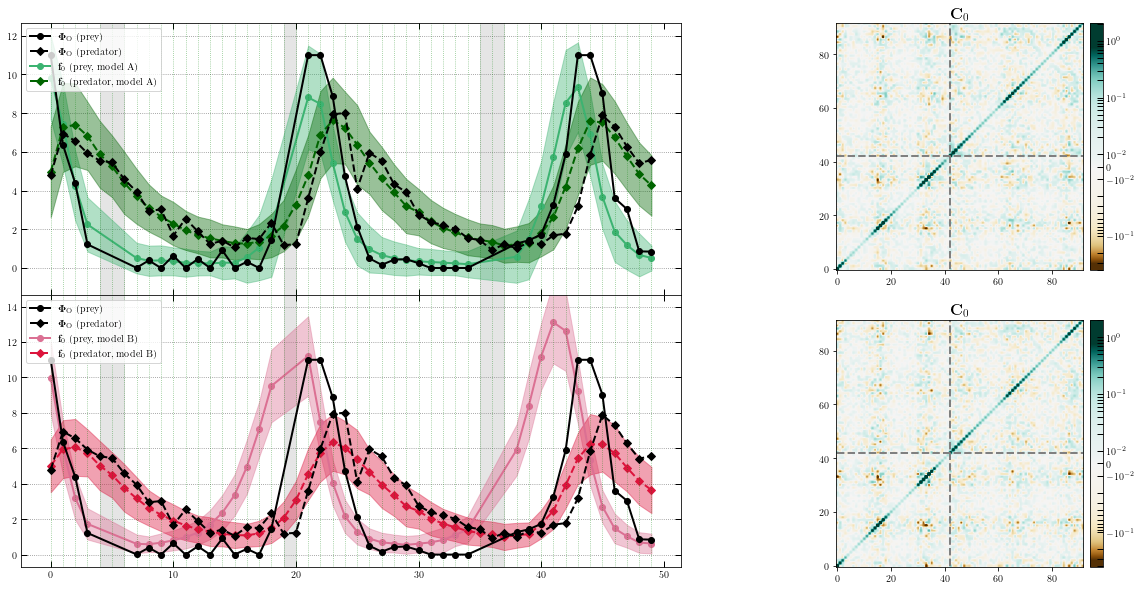

In [16]:
fig = plt.figure(figsize=(22,10))

gs0 = gridspec.GridSpec(2,2, width_ratios=[1.3,1.], height_ratios=[1.,1.], wspace=0.1, hspace=0.)
# gs0.update(right=1.,left=0.)
ax0 = plt.subplot(gs0[0,0])
ax0b = plt.subplot(gs0[1,0], sharex=ax0)

gs1 = gridspec.GridSpec(2,2)
# gs1.update(top=1.2,bottom=0.)
ax1 = plt.subplot(gs1[0,1])
ax3 = plt.subplot(gs1[1,1])

# Plot the data, mean blackbox and standard deviation
ax0.yaxis.grid(linestyle=':',color="grey")
ax0.xaxis.set_ticks_position('both')
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0.xaxis.set_tick_params(which='major', length=6)
ax0.xaxis.set_tick_params(which='minor', length=4)
ax0.yaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0.yaxis.set_tick_params(which='major', length=6)
ax0.plot(Xobs,Xdata,marker="o",ls="-",color="black",label="$\\boldsymbol{\Phi}_\mathrm{O}$ (prey)",zorder=5)
ax0.plot(Yobs,Ydata,marker="D",ls="--",color="black",label="$\\boldsymbol{\Phi}_\mathrm{O}$ (predator)",zorder=5)
ax0.plot(Xobs,Xf_0A,marker="o",ls="-",color="mediumseagreen",label="$\\textbf{f}_0$ (prey, model A)")
ax0.plot(Yobs,Yf_0A,marker="D",ls="--",color="darkgreen",label="$\\textbf{f}_0$ (predator, model A)")
ax0.fill_between(Xobs,Xf_0A-2*np.sqrt(np.diag(XC_0A)),
               Xf_0A+2*np.sqrt(np.diag(XC_0A)),
               color="mediumseagreen",alpha=0.4,zorder=2)
ax0.fill_between(Yobs,Yf_0A-2*np.sqrt(np.diag(YC_0A)),
               Yf_0A+2*np.sqrt(np.diag(YC_0A)),
               color="darkgreen",alpha=0.4,zorder=2)
(ymin,ymax)=ax0.get_ylim()
ax0.set_ylim([ymin,ymax])
for i in range(len(t_s)):
    ax0.plot([t_s[i],t_s[i]],[ymin,ymax],linestyle=':',linewidth=0.8,color='green',alpha=0.5)
for i in range(len(masks)):
    ax0.fill_between(masks[i],np.ones_like(masks[i])*ymin,np.ones_like(masks[i])*ymax,color="C7",alpha=0.2)
ax0.legend(loc="upper left")

# Plot the data covariance matrix at the expansion point
divider = make_axes_locatable(ax1)
ax1_cb = divider.new_horizontal(size="5%", pad=0.10)
ax1.plot([0,P],[PX,PX],color='grey',linestyle='--')
ax1.plot([PX,PX],[0,P],color='grey',linestyle='--')
im1 = ax1.imshow(C_0A,origin="lower",cmap=CovarianceMap,norm=MidpointSymLogNorm(midpoint=0.,
                                            linthresh=0.01, linscale=0.2, vmin=C_0A.min(), vmax=C_0A.max()))
ax1.set_title("$\\textbf{C}_0$",size=16)
fig.add_axes(ax1_cb)
cbar1 = fig.colorbar(im1, cax=ax1_cb)
cbar1.ax.tick_params(axis='y', direction='in', width=1.0, length=6)

ax0b.yaxis.grid(linestyle=':',color="grey")
ax0b.xaxis.set_ticks_position('both')
ax0b.yaxis.set_ticks_position('both')
ax0b.xaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0b.xaxis.set_tick_params(which='major', length=6)
ax0b.xaxis.set_tick_params(which='minor', length=4)
ax0b.yaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0b.yaxis.set_tick_params(which='major', length=6)
ax0b.plot(Xobs,Xdata,marker="o",ls="-",color="black",label="$\\boldsymbol{\Phi}_\mathrm{O}$ (prey)",zorder=5)
ax0b.plot(Yobs,Ydata,marker="D",ls="--",color="black",label="$\\boldsymbol{\Phi}_\mathrm{O}$ (predator)",zorder=5)
ax0b.plot(Xobs,Xf_0B,marker="o",ls="-",color="palevioletred",label="$\\textbf{f}_0$ (prey, model B)")
ax0b.plot(Yobs,Yf_0B,marker="D",ls="--",color="crimson",label="$\\textbf{f}_0$ (predator, model B)")
ax0b.fill_between(Xobs,Xf_0B-2*np.sqrt(np.diag(XC_0B)),
               Xf_0B+2*np.sqrt(np.diag(XC_0B)),
               color="palevioletred",alpha=0.4,zorder=2)
ax0b.fill_between(Yobs,Yf_0B-2*np.sqrt(np.diag(YC_0B)),
               Yf_0B+2*np.sqrt(np.diag(YC_0B)),
               color="crimson",alpha=0.4,zorder=2)
(ymin,ymax)=(ymin_ref,ymax_ref)
ax0b.set_ylim([ymin,ymax])
for i in range(len(t_s)):
    ax0b.plot([t_s[i],t_s[i]],[ymin,ymax],linestyle=':',linewidth=0.8,color='green',alpha=0.5)
for i in range(len(masks)):
    ax0b.fill_between(masks[i],np.ones_like(masks[i])*ymin,np.ones_like(masks[i])*ymax,color="C7",alpha=0.2)
ax0b.legend(loc="upper left")

# Plot the data covariance matrix at the expansion point
divider = make_axes_locatable(ax3)
ax3_cb = divider.new_horizontal(size="5%", pad=0.10)
ax3.plot([0,P],[PX,PX],color='grey',linestyle='--')
ax3.plot([PX,PX],[0,P],color='grey',linestyle='--')
im3 = ax3.imshow(C_0B,origin="lower",cmap=CovarianceMap,norm=MidpointSymLogNorm(midpoint=0.,
                                            linthresh=0.01, linscale=0.2, vmin=C_0B.min(), vmax=C_0B.max()))
ax3.set_title("$\\textbf{C}_0$",size=16)
fig.add_axes(ax3_cb)
cbar3 = fig.colorbar(im1, cax=ax3_cb)
cbar3.ax.tick_params(axis='y', direction='in', width=1.0, length=6)
    
plt.show()

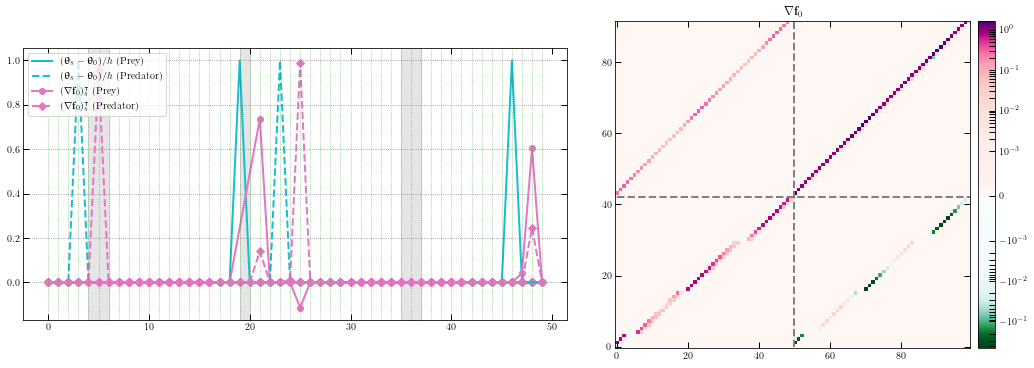

In [17]:
fig = plt.figure(figsize=(15,5))

gs0 = gridspec.GridSpec(1,2, width_ratios=[1.,0.5], height_ratios=[1.], wspace=0.65)
gs0.update(right=1.,left=0.)
ax0 = plt.subplot(gs0[0])
gs1 = gridspec.GridSpec(1,2)
gs1.update(top=1.,bottom=0.)
ax1 = plt.subplot(gs1[1])

# Plot some gradients of the blackbox
ax0.yaxis.grid(linestyle=':',color="grey")
ax0.xaxis.set_ticks_position('both')
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0.xaxis.set_tick_params(which='major', length=6)
ax0.xaxis.set_tick_params(which='minor', length=4)
ax0.yaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0.yaxis.set_tick_params(which='major', length=6)
for s in {20}:
# for s in {50}:
    theta_p=selfi_LV_modelA.likelihood._get_perturb_theta(s,Delta_theta)
    ax0.plot(t_s,(theta_p[0:S//2]-theta_exp[0:S//2])/Delta_theta,ls="-",color="C9",
             label="$(\\boldsymbol{\\uptheta}_{s}-\\boldsymbol{\\uptheta}_{0})/h$ (Prey)")
    ax0.plot(t_s,(theta_p[S//2:S]-theta_exp[S//2:S])/Delta_theta,ls="--",color="C9",
             label="$(\\boldsymbol{\\uptheta}_{s}-\\boldsymbol{\\uptheta}_{0})/h$ (Predator)")
    ax0.plot(Xobs,grad_fA[0:PX,s],linewidth=2,marker="o",linestyle="-",color="C6",label="$(\\nabla \\textbf{f}_0)^\intercal_{s}$ (Prey)",zorder=2)
    ax0.plot(Yobs,grad_fA[PX:P,s],linewidth=2,marker="D",linestyle="--",color="C6",label="$(\\nabla \\textbf{f}_0)^\intercal_{s}$ (Predator)",zorder=2)
for s in {47,54,74}:
    theta_p=selfi_LV_modelA.likelihood._get_perturb_theta(s,Delta_theta)
    ax0.plot(t_s,(theta_p[0:S//2]-theta_exp[0:S//2])/Delta_theta,ls="-",color="C9")
    ax0.plot(t_s,(theta_p[S//2:S]-theta_exp[S//2:S])/Delta_theta,ls="--",color="C9")
    ax0.plot(Xobs,grad_fA[0:PX,s],linewidth=2,marker="o",linestyle="-",color="C6",zorder=2)
    ax0.plot(Yobs,grad_fA[PX:P,s],linewidth=2,marker="D",linestyle="--",color="C6",zorder=2)

(ymin,ymax)=ax0.get_ylim()
ax0.set_ylim([ymin,ymax])
for i in range(len(t_s)):
    ax0.plot([t_s[i],t_s[i]],[ymin,ymax],linestyle=':',linewidth=0.8,color='green',alpha=0.5)
for i in range(len(masks)):
    ax0.fill_between(masks[i],np.ones_like(masks[i])*ymin,np.ones_like(masks[i])*ymax,color="C7",alpha=0.2)
ax0.legend(loc="upper left")

# Plot the gradient of the blackbox
ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_tick_params(which='both', direction='in', width=1.0)
ax1.xaxis.set_tick_params(which='major', length=6)
ax1.xaxis.set_tick_params(which='minor', length=4)
ax1.yaxis.set_tick_params(which='both', direction='in', width=1.0)
ax1.yaxis.set_tick_params(which='major', length=6)
ax1.yaxis.set_tick_params(which='minor', length=4)
divider = make_axes_locatable(ax1)
ax1_cb = divider.new_horizontal(size="5%", pad=0.10)
ax1.plot([0,S],[PX,PX],color='grey',linestyle='--')
ax1.plot([S//2,S//2],[0,P],color='grey',linestyle='--')
im1 = ax1.imshow(grad_fA,origin="lower",cmap=GradientMap,norm=MidpointSymLogNorm(midpoint=0.,
                                            linthresh=1e-3, linscale=1, vmin=grad_fA.min(), vmax=grad_fA.max()))
ax1.set_title("$\\nabla \\textbf{f}_0$")
fig.add_axes(ax1_cb)
cbar1 = fig.colorbar(im1, cax=ax1_cb)
cbar1.ax.tick_params(axis='y', direction='in', width=1.0, length=6)

plt.show()

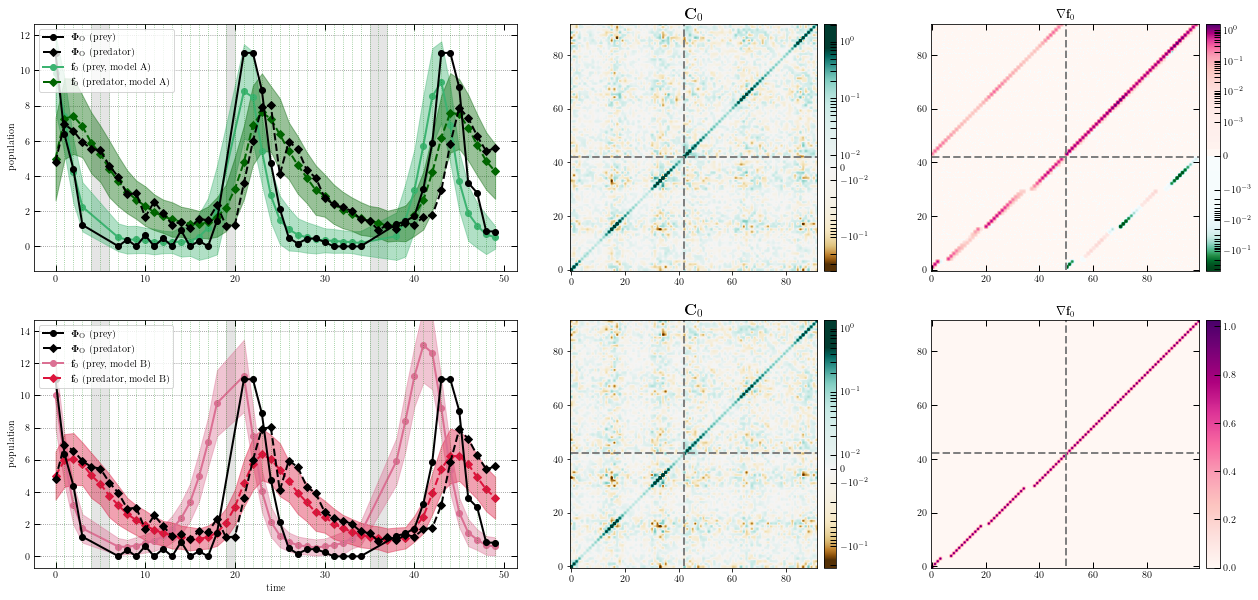

In [18]:
fig = plt.figure(figsize=(22,10))

gs0 = gridspec.GridSpec(2,3, width_ratios=[1.3,1.,1.], height_ratios=[1.,1.], wspace=0., hspace=0.2)
ax0a = plt.subplot(gs0[0,0])
ax0b = plt.subplot(gs0[1,0], sharex=ax0a)
ax1a = plt.subplot(gs0[0,1])
ax1b = plt.subplot(gs0[1,1], sharex=ax1a)
ax2a = plt.subplot(gs0[0,2])
ax2b = plt.subplot(gs0[1,2], sharex=ax2a)

# Plot the data, mean blackbox and standard deviation
ax0a.yaxis.grid(linestyle=':',color="grey")
ax0a.xaxis.set_ticks_position('both')
ax0a.yaxis.set_ticks_position('both')
ax0a.xaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0a.xaxis.set_tick_params(which='major', length=6)
ax0a.xaxis.set_tick_params(which='minor', length=4)
ax0a.yaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0a.yaxis.set_tick_params(which='major', length=6)
ax0a.plot(Xobs,Xdata,marker="o",ls="-",color="black",label="$\\boldsymbol{\Phi}_\mathrm{O}$ (prey)",zorder=5)
ax0a.plot(Yobs,Ydata,marker="D",ls="--",color="black",label="$\\boldsymbol{\Phi}_\mathrm{O}$ (predator)",zorder=5)
ax0a.plot(Xobs,Xf_0A,marker="o",ls="-",color="mediumseagreen",label="$\\textbf{f}_0$ (prey, model A)")
ax0a.plot(Yobs,Yf_0A,marker="D",ls="--",color="darkgreen",label="$\\textbf{f}_0$ (predator, model A)")
ax0a.fill_between(Xobs,Xf_0A-2*np.sqrt(np.diag(XC_0A)),
               Xf_0A+2*np.sqrt(np.diag(XC_0A)),
               color="mediumseagreen",alpha=0.4,zorder=2)
ax0a.fill_between(Yobs,Yf_0A-2*np.sqrt(np.diag(YC_0A)),
               Yf_0A+2*np.sqrt(np.diag(YC_0A)),
               color="darkgreen",alpha=0.4,zorder=2)
(ymin,ymax)=ax0a.get_ylim()
ax0a.set_ylim([ymin,ymax])
for i in range(len(t_s)):
    ax0a.plot([t_s[i],t_s[i]],[ymin,ymax],linestyle=':',linewidth=0.8,color='green',alpha=0.5)
for i in range(len(masks)):
    ax0a.fill_between(masks[i],np.ones_like(masks[i])*ymin,np.ones_like(masks[i])*ymax,color="C7",alpha=0.2)
ax0a.set_ylabel("population")
ax0a.legend(loc="upper left")

ax0b.yaxis.grid(linestyle=':',color="grey")
ax0b.xaxis.set_ticks_position('both')
ax0b.yaxis.set_ticks_position('both')
ax0b.xaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0b.xaxis.set_tick_params(which='major', length=6)
ax0b.xaxis.set_tick_params(which='minor', length=4)
ax0b.yaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0b.yaxis.set_tick_params(which='major', length=6)
ax0b.plot(Xobs,Xdata,marker="o",ls="-",color="black",label="$\\boldsymbol{\Phi}_\mathrm{O}$ (prey)",zorder=5)
ax0b.plot(Yobs,Ydata,marker="D",ls="--",color="black",label="$\\boldsymbol{\Phi}_\mathrm{O}$ (predator)",zorder=5)
ax0b.plot(Xobs,Xf_0B,marker="o",ls="-",color="palevioletred",label="$\\textbf{f}_0$ (prey, model B)")
ax0b.plot(Yobs,Yf_0B,marker="D",ls="--",color="crimson",label="$\\textbf{f}_0$ (predator, model B)")
ax0b.fill_between(Xobs,Xf_0B-2*np.sqrt(np.diag(XC_0B)),
               Xf_0B+2*np.sqrt(np.diag(XC_0B)),
               color="palevioletred",alpha=0.4,zorder=2)
ax0b.fill_between(Yobs,Yf_0B-2*np.sqrt(np.diag(YC_0B)),
               Yf_0B+2*np.sqrt(np.diag(YC_0B)),
               color="crimson",alpha=0.4,zorder=2)
(ymin,ymax)=(ymin_ref,ymax_ref)
ax0b.set_ylim([ymin,ymax])
for i in range(len(t_s)):
    ax0b.plot([t_s[i],t_s[i]],[ymin,ymax],linestyle=':',linewidth=0.8,color='green',alpha=0.5)
for i in range(len(masks)):
    ax0b.fill_between(masks[i],np.ones_like(masks[i])*ymin,np.ones_like(masks[i])*ymax,color="C7",alpha=0.2)
ax0b.set_xlabel("time")
ax0b.set_ylabel("population")
ax0b.legend(loc="upper left")


# Plot the data covariance matrix at the expansion point
divider = make_axes_locatable(ax1a)
ax1a_cb = divider.new_horizontal(size="5%", pad=0.10)
ax1a.plot([0,P],[PX,PX],color='grey',linestyle='--')
ax1a.plot([PX,PX],[0,P],color='grey',linestyle='--')
im1a = ax1a.imshow(C_0A,origin="lower",cmap=CovarianceMap,norm=MidpointSymLogNorm(midpoint=0.,
                                            linthresh=0.01, linscale=0.2, vmin=C_0A.min(), vmax=C_0A.max()))
ax1a.set_title("$\\textbf{C}_0$",size=16)
fig.add_axes(ax1a_cb)
cbar1a = fig.colorbar(im1a, cax=ax1a_cb)
cbar1a.ax.tick_params(axis='y', direction='in', width=1.0, length=6)

divider = make_axes_locatable(ax1b)
ax1b_cb = divider.new_horizontal(size="5%", pad=0.10)
ax1b.plot([0,P],[PX,PX],color='grey',linestyle='--')
ax1b.plot([PX,PX],[0,P],color='grey',linestyle='--')
im1b = ax1b.imshow(C_0B,origin="lower",cmap=CovarianceMap,norm=MidpointSymLogNorm(midpoint=0.,
                                            linthresh=0.01, linscale=0.2, vmin=C_0B.min(), vmax=C_0B.max()))
ax1b.set_title("$\\textbf{C}_0$",size=16)
fig.add_axes(ax1b_cb)
cbar1b = fig.colorbar(im1b, cax=ax1b_cb)
cbar1b.ax.tick_params(axis='y', direction='in', width=1.0, length=6)

# Plot the gradient of the blackbox
ax2a.xaxis.set_ticks_position('both')
ax2a.yaxis.set_ticks_position('both')
ax2a.xaxis.set_tick_params(which='both', direction='in', width=1.0)
ax2a.xaxis.set_tick_params(which='major', length=6)
ax2a.xaxis.set_tick_params(which='minor', length=4)
ax2a.yaxis.set_tick_params(which='both', direction='in', width=1.0)
ax2a.yaxis.set_tick_params(which='major', length=6)
ax2a.yaxis.set_tick_params(which='minor', length=4)
ax2a.plot([0,S],[PX,PX],color='grey',linestyle='--')
ax2a.plot([S//2,S//2],[0,P],color='grey',linestyle='--')
divider = make_axes_locatable(ax2a)
ax2a_cb = divider.new_horizontal(size="5%", pad=0.10)
im2a = ax2a.imshow(grad_fA,origin="lower",cmap=GradientMap,norm=MidpointSymLogNorm(midpoint=0.,
                                            linthresh=1e-3, linscale=1, vmin=grad_fA.min(), vmax=grad_fA.max()))
ax2a.set_title("$\\nabla \\textbf{f}_0$")
fig.add_axes(ax2a_cb)
cbar2a = fig.colorbar(im2a, cax=ax2a_cb)
cbar2a.ax.tick_params(axis='y', direction='in', width=1.0, length=6)

ax2b.xaxis.set_ticks_position('both')
ax2b.yaxis.set_ticks_position('both')
ax2b.xaxis.set_tick_params(which='both', direction='in', width=1.0)
ax2b.xaxis.set_tick_params(which='major', length=6)
ax2b.xaxis.set_tick_params(which='minor', length=4)
ax2b.yaxis.set_tick_params(which='both', direction='in', width=1.0)
ax2b.yaxis.set_tick_params(which='major', length=6)
ax2b.yaxis.set_tick_params(which='minor', length=4)
ax2b.plot([0,S],[PX,PX],color='grey',linestyle='--')
ax2b.plot([S//2,S//2],[0,P],color='grey',linestyle='--')
divider = make_axes_locatable(ax2b)
ax2b_cb = divider.new_horizontal(size="5%", pad=0.10)
im2b = ax2b.imshow(grad_fB,origin="lower",cmap='RdPu',vmin=grad_fB.min(),vmax=grad_fB.max())
ax2b.set_title("$\\nabla \\textbf{f}_0$")
fig.add_axes(ax2b_cb)
cbar2b = fig.colorbar(im2b, cax=ax2b_cb)
cbar2b.ax.tick_params(axis='y', direction='in', width=1.0, length=6)

plt.show()

In [19]:
np.savez("plots/blackbox",t_s=t_s,S=S,PX=PX,P=P,ymin_ref=ymin_ref,ymax_ref=ymax_ref,masks=np.array(masks, dtype=object),
         Xobs=Xobs,Yobs=Yobs,Xdata=Xdata,Ydata=Ydata,
         C_0A=C_0A,grad_fA=grad_fA,Phi_0A=Phi_0A,f_0A=f_0A,
         C_0B=C_0B,grad_fB=grad_fB,Phi_0B=Phi_0B,f_0B=f_0B)

# Posterior

In [20]:
XpostA = selfi_LV_modelA.posterior.mean[0:S//2]
YpostA = selfi_LV_modelA.posterior.mean[S//2:S]
sigma_pA = np.sqrt(np.diag(selfi_LV_modelA.posterior.covariance))
sigma_tA = np.sqrt(np.diag(selfi_LV_modelA.prior.covariance))
SA = selfi_LV_modelA.prior.covariance
GammaA = selfi_LV_modelA.posterior.covariance
XpostB = selfi_LV_modelB.posterior.mean[0:S//2]
YpostB = selfi_LV_modelB.posterior.mean[S//2:S]
sigma_pB = np.sqrt(np.diag(selfi_LV_modelB.posterior.covariance))
sigma_tB = np.sqrt(np.diag(selfi_LV_modelB.prior.covariance))
SB = selfi_LV_modelB.prior.covariance
GammaB = selfi_LV_modelB.posterior.covariance

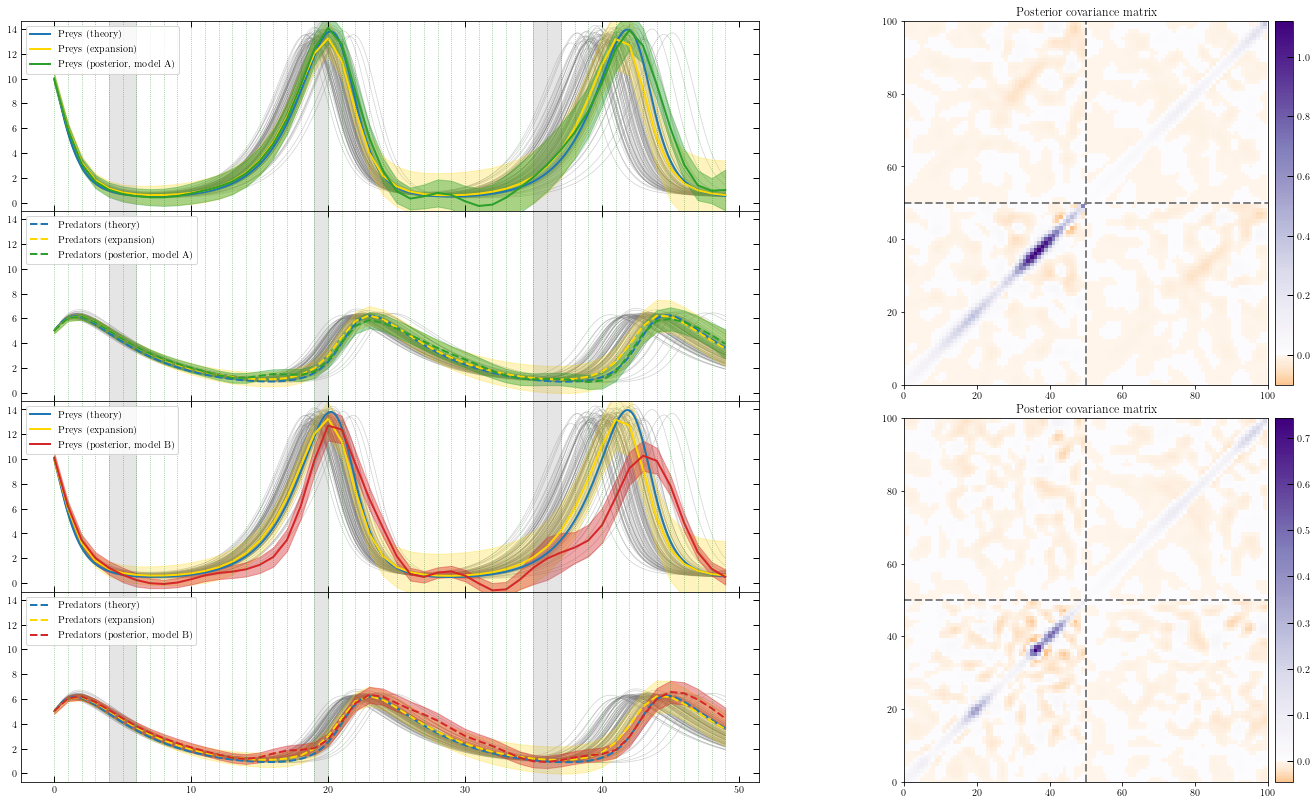

In [21]:
fig = plt.figure(figsize=(25,14))

gs0 = gridspec.GridSpec(4,2, width_ratios=[1.25,1.], height_ratios=[1.,1.,1.,1.], wspace=0.1, hspace=0.)
# gs0.update(right=1.,left=0.)
ax0 = plt.subplot(gs0[0,0])
ax0b = plt.subplot(gs0[1,0], sharex=ax0)

gs1 = gridspec.GridSpec(4,2)
# gs1.update(top=1.2,bottom=0.)
ax1 = plt.subplot(gs1[0:2,1])
ax3 = plt.subplot(gs1[2:4,1])

ax2 = plt.subplot(gs0[2,0])
ax2b = plt.subplot(gs0[3,0], sharex=ax2)

# Plot the expansion function, prior, and posterior
ax0.xaxis.set_ticks_position('both')
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0.xaxis.set_tick_params(which='major', length=6)
ax0.xaxis.set_tick_params(which='minor', length=4)
ax0.yaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0.yaxis.set_tick_params(which='major', length=6)
for n in range(Nfid):
    ax0.plot(t,Xthfid[n],ls="-",color="C7",alpha=0.35,linewidth=0.7,zorder=0.5)
ax0.plot(t,Xtheory,ls="-",color="C0",label="Preys (theory)")
ax0.plot(t_s,Xexp,ls="-",color="gold",label="Preys (expansion)")
ax0.fill_between(t_s,Xexp-2*sigma_tA[0:S//2],Xexp+2*sigma_tA[0:S//2],color="gold",alpha=0.25)
ax0.plot(t_s,XpostA,ls="-",color="C2",label="Preys (posterior, model A)")
ax0.fill_between(t_s,XpostA-2*sigma_pA[0:S//2],XpostA+2*sigma_pA[0:S//2],color="C2",alpha=0.4)
(ymin,ymax)=(ymin_ref,ymax_ref)
ax0.set_ylim([ymin,ymax])
for i in range(len(t_s)):
    ax0.plot([t_s[i],t_s[i]],[ymin,ymax],linestyle=':',linewidth=0.8,color='green',alpha=0.5)
for i in range(len(masks)):
    ax0.fill_between(masks[i],np.ones_like(masks[i])*ymin,np.ones_like(masks[i])*ymax,color="C7",alpha=0.2)
ax0.legend(loc="upper left")

ax0b.xaxis.set_ticks_position('both')
ax0b.yaxis.set_ticks_position('both')
ax0b.xaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0b.xaxis.set_tick_params(which='major', length=6)
ax0b.xaxis.set_tick_params(which='minor', length=4)
ax0b.yaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0b.yaxis.set_tick_params(which='major', length=6)
for n in range(Nfid):
    ax0b.plot(t,Ythfid[n],ls="-",color="C7",alpha=0.35,linewidth=0.7,zorder=0.5)
ax0b.plot(t,Ytheory,ls="--",color="C0",label="Predators (theory)")
ax0b.plot(t_s,Yexp,ls="--",color="gold",label="Predators (expansion)")
ax0b.fill_between(t_s,Yexp-2*sigma_tA[S//2:S],Yexp+2*sigma_tA[S//2:S],color="gold",alpha=0.25)
ax0b.plot(t_s,YpostA,ls="--",color="C2",label="Predators (posterior, model A)")
ax0b.fill_between(t_s,YpostA-2*sigma_pA[S//2:S],YpostA+2*sigma_pA[S//2:S],color="C2",alpha=0.4)
(ymin,ymax)=(ymin_ref,ymax_ref)
ax0b.set_ylim([ymin,ymax])
for i in range(len(t_s)):
    ax0b.plot([t_s[i],t_s[i]],[ymin,ymax],linestyle=':',linewidth=0.8,color='green',alpha=0.5)
for i in range(len(masks)):
    ax0b.fill_between(masks[i],np.ones_like(masks[i])*ymin,np.ones_like(masks[i])*ymax,color="C7",alpha=0.2)
ax0b.legend(loc="upper left")

# Plot the posterior covariance matrix
divider = make_axes_locatable(ax1)
ax1_cb = divider.new_horizontal(size="5%", pad=0.10)
im1 = ax1.imshow(GammaA,origin="lower",cmap=Purples_Oranges,norm=MidpointNormalize(midpoint=0.))
ax1.set_xlim([0,S])
ax1.set_ylim([0,S])
ax1.plot([0,S],[S//2,S//2],color='grey',linestyle='--')
ax1.plot([S//2,S//2],[0,S],color='grey',linestyle='--')
ax1.set_title("Posterior covariance matrix")
fig.add_axes(ax1_cb)
cbar1 = fig.colorbar(im1, cax=ax1_cb)
cbar1.ax.tick_params(axis='y', direction='in', width=1.0, length=6)

# Plot the expansion function, prior, and posterior
ax2.xaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('both')
ax2.xaxis.set_tick_params(which='both', direction='in', width=1.0)
ax2.xaxis.set_tick_params(which='major', length=6)
ax2.xaxis.set_tick_params(which='minor', length=4)
ax2.yaxis.set_tick_params(which='both', direction='in', width=1.0)
ax2.yaxis.set_tick_params(which='major', length=6)
for n in range(Nfid):
    ax2.plot(t,Xthfid[n],ls="-",color="C7",alpha=0.35,linewidth=0.7,zorder=0.5)
ax2.plot(t,Xtheory,ls="-",color="C0",label="Preys (theory)")
ax2.plot(t_s,Xexp,ls="-",color="gold",label="Preys (expansion)")
ax2.fill_between(t_s,Xexp-2*sigma_tB[0:S//2],Xexp+2*sigma_tB[0:S//2],color="gold",alpha=0.25)
ax2.plot(t_s,XpostB,ls="-",color="C3",label="Preys (posterior, model B)")
ax2.fill_between(t_s,XpostB-2*sigma_pB[0:S//2],XpostB+2*sigma_pB[0:S//2],color="C3",alpha=0.4)
(ymin,ymax)=(ymin_ref,ymax_ref)
ax2.set_ylim([ymin,ymax])
for i in range(len(t_s)):
    ax2.plot([t_s[i],t_s[i]],[ymin,ymax],linestyle=':',linewidth=0.8,color='green',alpha=0.5)
for i in range(len(masks)):
    ax2.fill_between(masks[i],np.ones_like(masks[i])*ymin,np.ones_like(masks[i])*ymax,color="C7",alpha=0.2)
ax2.legend(loc="upper left")

ax2b.xaxis.set_ticks_position('both')
ax2b.yaxis.set_ticks_position('both')
ax2b.xaxis.set_tick_params(which='both', direction='in', width=1.0)
ax2b.xaxis.set_tick_params(which='major', length=6)
ax2b.xaxis.set_tick_params(which='minor', length=4)
ax2b.yaxis.set_tick_params(which='both', direction='in', width=1.0)
ax2b.yaxis.set_tick_params(which='major', length=6)
for n in range(Nfid):
    ax2b.plot(t,Ythfid[n],ls="-",color="C7",alpha=0.35,linewidth=0.7,zorder=0.5)
ax2b.plot(t,Ytheory,ls="--",color="C0",label="Predators (theory)")
ax2b.plot(t_s,Yexp,ls="--",color="gold",label="Predators (expansion)")
ax2b.fill_between(t_s,Yexp-2*sigma_tB[S//2:S],Yexp+2*sigma_tB[S//2:S],color="gold",alpha=0.25)
ax2b.plot(t_s,YpostB,ls="--",color="C3",label="Predators (posterior, model B)")
ax2b.fill_between(t_s,YpostB-2*sigma_pB[S//2:S],YpostB+2*sigma_pB[S//2:S],color="C3",alpha=0.4)
(ymin,ymax)=(ymin_ref,ymax_ref)
ax2b.set_ylim([ymin,ymax])
for i in range(len(t_s)):
    ax2b.plot([t_s[i],t_s[i]],[ymin,ymax],linestyle=':',linewidth=0.8,color='green',alpha=0.5)
for i in range(len(masks)):
    ax2b.fill_between(masks[i],np.ones_like(masks[i])*ymin,np.ones_like(masks[i])*ymax,color="C7",alpha=0.2)
ax2b.legend(loc="upper left")

# Plot the posterior covariance matrix
divider = make_axes_locatable(ax3)
ax3_cb = divider.new_horizontal(size="5%", pad=0.10)
im3 = ax3.imshow(GammaB,origin="lower",cmap=Purples_Oranges,norm=MidpointNormalize(midpoint=0.))
ax3.set_xlim([0,S])
ax3.set_ylim([0,S])
ax3.plot([0,S],[S//2,S//2],color='grey',linestyle='--')
ax3.plot([S//2,S//2],[0,S],color='grey',linestyle='--')
ax3.set_title("Posterior covariance matrix")
fig.add_axes(ax3_cb)
cbar3 = fig.colorbar(im3, cax=ax3_cb)
cbar3.ax.tick_params(axis='y', direction='in', width=1.0, length=6)

plt.show()

In [22]:
Rao_0 = selfi_LV_modelA.Mahalanobis_ms_check()
Rao_1 = selfi_LV_modelB.Mahalanobis_ms_check()
Rao_fid = np.array([selfi_LV_modelA.Mahalanobis_ms_check(theta_fid[i]) for i in range(Nfid)])
Rao_0, Rao_1, Rao_fid.mean()

(5.468190696464094, 11.356947618320179, 9.513440795349657)

# Prior optimisation

In [23]:
selfi_LV_modelA.loglikelihood_hyperparams(theta_fid, 0.02, 1.6, 10.2)

-29.86910321664542

In [24]:
# Prepare the hyperparameters plot
alpha_norm_min=1e-10
alpha_norm_max=0.5
t_smooth_min=1.5
t_smooth_max=1.75
t_chaos_min=4
t_chaos_max=12.5
meshsize=20
t_smooths,t_chaoss=np.meshgrid(np.linspace(t_smooth_min,t_smooth_max,meshsize),np.linspace(t_chaos_min,t_chaos_max,meshsize))
Z=np.zeros((meshsize,meshsize))

for i in range(meshsize):
    for j in range(meshsize):
        Z[i][j]=selfi_LV_modelA.logposterior_hyperparameters(theta_fid, 0.02, t_smooths[i][j], t_chaoss[i][j])
Z-=Z.max()
Z=np.exp(Z)
Z_contours = get_contours(Z, meshsize)

In [25]:
alpha_norm_ini = 0.02
t_smooth_ini = 1.6
t_chaos_ini = 8.2
x0 = [alpha_norm_ini, t_smooth_ini, t_chaos_ini]
selfi_LV_modelA.optimize_prior(theta_fid, x0, alpha_norm_min, alpha_norm_max, t_smooth_min, t_smooth_max, t_chaos_min, t_chaos_max)
selfi_LV_modelB.optimize_prior(theta_fid, x0, alpha_norm_min, alpha_norm_max, t_smooth_min, t_smooth_max, t_chaos_min, t_chaos_max)

      fun: 25.091098272241844
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 6.48002008e-02, -5.69069059e-03,  3.51221274e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 172
      nit: 26
     njev: 43
   status: 0
  success: True
        x: array([0.02008623, 1.63952116, 7.28585059])
      fun: 265.3559292760266
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 7.68685481e-01, -1.08953486e-02,  2.06171080e-04])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 160
      nit: 16
     njev: 40
   status: 0
  success: True
        x: array([0.01448666, 1.53070851, 9.60333318])


Text(0, 0.5, '$t_\\mathrm{chaos}$ [$h$/Mpc]')

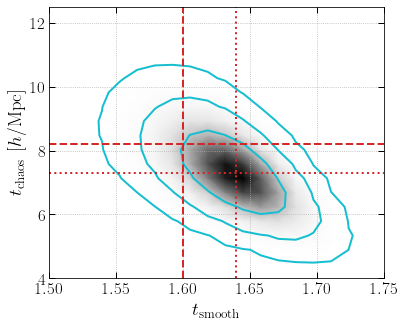

In [26]:
fig, (ax) = plt.subplots(figsize=(6,5), ncols=1)

ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(which='both', direction='in', width=1.0)
ax.xaxis.set_tick_params(which='major', length=6, labelsize=17)
ax.xaxis.set_tick_params(which='minor', length=4)
ax.yaxis.set_tick_params(which='both', direction='in', width=1.0)
ax.yaxis.set_tick_params(which='major', length=6, labelsize=17)

pcm = ax.pcolormesh(t_smooths,t_chaoss,Z, cmap="Greys", shading='gouraud')
ax.grid(linestyle=':')
ax.contour(Z, Z_contours,
            extent=[t_smooth_min,t_smooth_max,t_chaos_min,t_chaos_max], colors='C9')
ax.vlines(selfi_LV_modelA.prior.get_t_smooth(), t_chaos_min, t_chaos_max, color='C3',linestyle=':')
ax.hlines(selfi_LV_modelA.prior.get_t_chaos(), t_smooth_min, t_smooth_max, color='C3',linestyle=':')
ax.vlines(t_smooth_ini, t_chaos_min, t_chaos_max,color='C3', linestyle='--')
ax.hlines(t_chaos_ini, t_smooth_min, t_smooth_max, color='C3',linestyle='--')
ax.set_xlabel("$t_\mathrm{smooth}$",size=19)
ax.set_ylabel("$t_\mathrm{chaos}$ [$h$/Mpc]",size=19)

In [27]:
selfi_LV_modelA.prior.get_alpha_norm(), selfi_LV_modelB.prior.get_alpha_norm()

(0.02008622589710674, 0.014486660232055564)

In [28]:
selfi_LV_modelA.prior.get_t_smooth(), selfi_LV_modelB.prior.get_t_smooth()

(1.6395211594586732, 1.5307085146501418)

In [29]:
selfi_LV_modelA.prior.get_t_chaos(), selfi_LV_modelB.prior.get_t_chaos()

(7.285850590725945, 9.603333184197405)

In [30]:
XpostA = selfi_LV_modelA.posterior.mean[0:S//2]
YpostA = selfi_LV_modelA.posterior.mean[S//2:S]
sigma_pA = np.sqrt(np.diag(selfi_LV_modelA.posterior.covariance))
sigma_tA = np.sqrt(np.diag(selfi_LV_modelA.prior.covariance))
GammaA = selfi_LV_modelA.posterior.covariance
XpostB = selfi_LV_modelB.posterior.mean[0:S//2]
YpostB = selfi_LV_modelB.posterior.mean[S//2:S]
sigma_pB = np.sqrt(np.diag(selfi_LV_modelB.posterior.covariance))
sigma_tB = np.sqrt(np.diag(selfi_LV_modelB.prior.covariance))
GammaB = selfi_LV_modelB.posterior.covariance

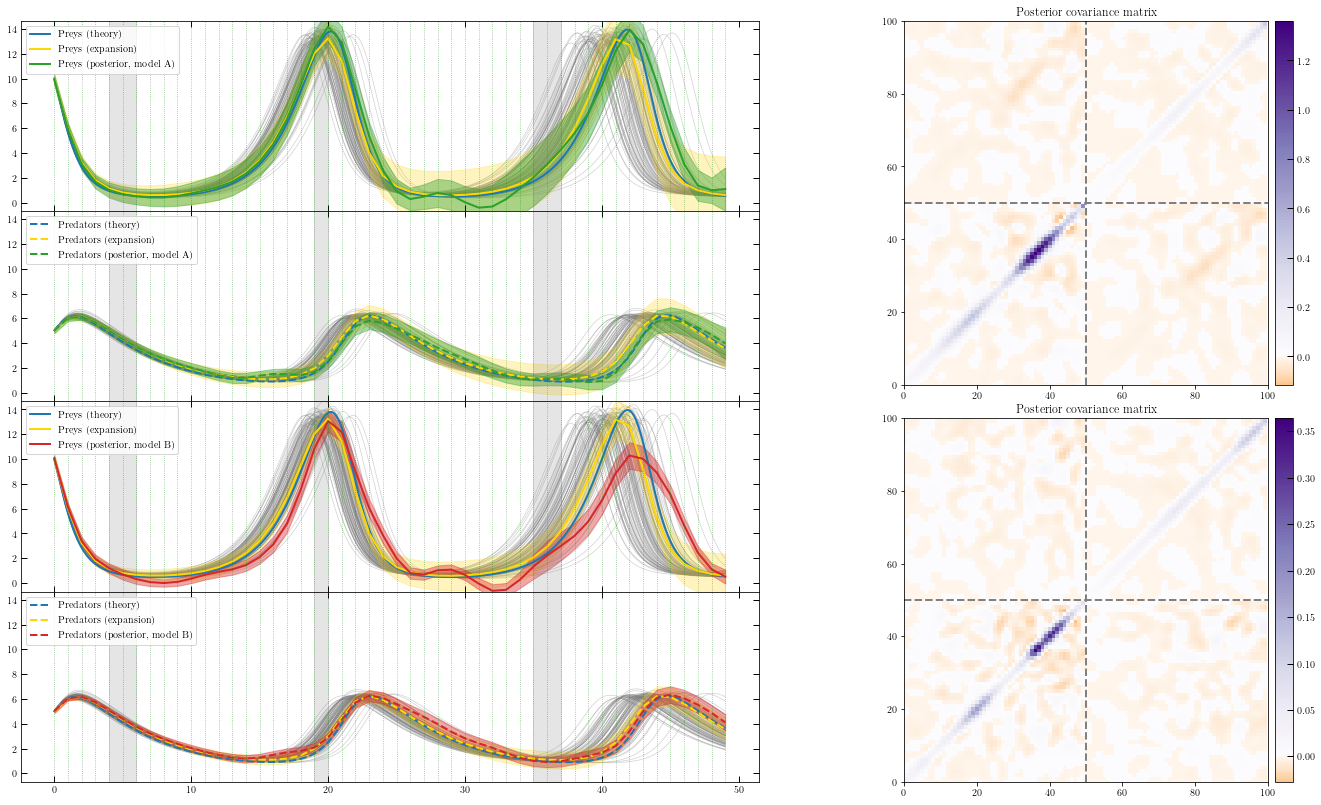

In [31]:
fig = plt.figure(figsize=(25,14))

gs0 = gridspec.GridSpec(4,2, width_ratios=[1.25,1.], height_ratios=[1.,1.,1.,1.], wspace=0.1, hspace=0.)
# gs0.update(right=1.,left=0.)
ax0 = plt.subplot(gs0[0,0])
ax0b = plt.subplot(gs0[1,0], sharex=ax0)

gs1 = gridspec.GridSpec(4,2)
# gs1.update(top=1.2,bottom=0.)
ax1 = plt.subplot(gs1[0:2,1])
ax3 = plt.subplot(gs1[2:4,1])

ax2 = plt.subplot(gs0[2,0])
ax2b = plt.subplot(gs0[3,0], sharex=ax2)

# Plot the expansion function, prior, and posterior
ax0.xaxis.set_ticks_position('both')
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0.xaxis.set_tick_params(which='major', length=6)
ax0.xaxis.set_tick_params(which='minor', length=4)
ax0.yaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0.yaxis.set_tick_params(which='major', length=6)
for n in range(Nfid):
    ax0.plot(t,Xthfid[n],ls="-",color="C7",alpha=0.35,linewidth=0.7,zorder=0.5)
ax0.plot(t,Xtheory,ls="-",color="C0",label="Preys (theory)")
ax0.plot(t_s,Xexp,ls="-",color="gold",label="Preys (expansion)")
ax0.fill_between(t_s,Xexp-2*sigma_tA[0:S//2],Xexp+2*sigma_tA[0:S//2],color="gold",alpha=0.25)
ax0.plot(t_s,XpostA,ls="-",color="C2",label="Preys (posterior, model A)")
ax0.fill_between(t_s,XpostA-2*sigma_pA[0:S//2],XpostA+2*sigma_pA[0:S//2],color="C2",alpha=0.4)
(ymin,ymax)=(ymin_ref,ymax_ref)
ax0.set_ylim([ymin,ymax])
for i in range(len(t_s)):
    ax0.plot([t_s[i],t_s[i]],[ymin,ymax],linestyle=':',linewidth=0.8,color='green',alpha=0.5)
for i in range(len(masks)):
    ax0.fill_between(masks[i],np.ones_like(masks[i])*ymin,np.ones_like(masks[i])*ymax,color="C7",alpha=0.2)
ax0.legend(loc="upper left")

ax0b.xaxis.set_ticks_position('both')
ax0b.yaxis.set_ticks_position('both')
ax0b.xaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0b.xaxis.set_tick_params(which='major', length=6)
ax0b.xaxis.set_tick_params(which='minor', length=4)
ax0b.yaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0b.yaxis.set_tick_params(which='major', length=6)
for n in range(Nfid):
    ax0b.plot(t,Ythfid[n],ls="-",color="C7",alpha=0.35,linewidth=0.7,zorder=0.5)
ax0b.plot(t,Ytheory,ls="--",color="C0",label="Predators (theory)")
ax0b.plot(t_s,Yexp,ls="--",color="gold",label="Predators (expansion)")
ax0b.fill_between(t_s,Yexp-2*sigma_tA[S//2:S],Yexp+2*sigma_tA[S//2:S],color="gold",alpha=0.25)
ax0b.plot(t_s,YpostA,ls="--",color="C2",label="Predators (posterior, model A)")
ax0b.fill_between(t_s,YpostA-2*sigma_pA[S//2:S],YpostA+2*sigma_pA[S//2:S],color="C2",alpha=0.4)
(ymin,ymax)=(ymin_ref,ymax_ref)
ax0b.set_ylim([ymin,ymax])
for i in range(len(t_s)):
    ax0b.plot([t_s[i],t_s[i]],[ymin,ymax],linestyle=':',linewidth=0.8,color='green',alpha=0.5)
for i in range(len(masks)):
    ax0b.fill_between(masks[i],np.ones_like(masks[i])*ymin,np.ones_like(masks[i])*ymax,color="C7",alpha=0.2)
ax0b.legend(loc="upper left")

# Plot the posterior covariance matrix
divider = make_axes_locatable(ax1)
ax1_cb = divider.new_horizontal(size="5%", pad=0.10)
im1 = ax1.imshow(GammaA,origin="lower",cmap=Purples_Oranges,norm=MidpointNormalize(midpoint=0.))
ax1.set_xlim([0,S])
ax1.set_ylim([0,S])
ax1.plot([0,S],[S//2,S//2],color='grey',linestyle='--')
ax1.plot([S//2,S//2],[0,S],color='grey',linestyle='--')
ax1.set_title("Posterior covariance matrix")
fig.add_axes(ax1_cb)
cbar1 = fig.colorbar(im1, cax=ax1_cb)
cbar1.ax.tick_params(axis='y', direction='in', width=1.0, length=6)

# Plot the expansion function, prior, and posterior
ax2.xaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('both')
ax2.xaxis.set_tick_params(which='both', direction='in', width=1.0)
ax2.xaxis.set_tick_params(which='major', length=6)
ax2.xaxis.set_tick_params(which='minor', length=4)
ax2.yaxis.set_tick_params(which='both', direction='in', width=1.0)
ax2.yaxis.set_tick_params(which='major', length=6)
for n in range(Nfid):
    ax2.plot(t,Xthfid[n],ls="-",color="C7",alpha=0.35,linewidth=0.7,zorder=0.5)
ax2.plot(t,Xtheory,ls="-",color="C0",label="Preys (theory)")
ax2.plot(t_s,Xexp,ls="-",color="gold",label="Preys (expansion)")
ax2.fill_between(t_s,Xexp-2*sigma_tB[0:S//2],Xexp+2*sigma_tB[0:S//2],color="gold",alpha=0.25)
ax2.plot(t_s,XpostB,ls="-",color="C3",label="Preys (posterior, model B)")
ax2.fill_between(t_s,XpostB-2*sigma_pB[0:S//2],XpostB+2*sigma_pB[0:S//2],color="C3",alpha=0.4)
(ymin,ymax)=(ymin_ref,ymax_ref)
ax2.set_ylim([ymin,ymax])
for i in range(len(t_s)):
    ax2.plot([t_s[i],t_s[i]],[ymin,ymax],linestyle=':',linewidth=0.8,color='green',alpha=0.5)
for i in range(len(masks)):
    ax2.fill_between(masks[i],np.ones_like(masks[i])*ymin,np.ones_like(masks[i])*ymax,color="C7",alpha=0.2)
ax2.legend(loc="upper left")

ax2b.xaxis.set_ticks_position('both')
ax2b.yaxis.set_ticks_position('both')
ax2b.xaxis.set_tick_params(which='both', direction='in', width=1.0)
ax2b.xaxis.set_tick_params(which='major', length=6)
ax2b.xaxis.set_tick_params(which='minor', length=4)
ax2b.yaxis.set_tick_params(which='both', direction='in', width=1.0)
ax2b.yaxis.set_tick_params(which='major', length=6)
for n in range(Nfid):
    ax2b.plot(t,Ythfid[n],ls="-",color="C7",alpha=0.35,linewidth=0.7,zorder=0.5)
ax2b.plot(t,Ytheory,ls="--",color="C0",label="Predators (theory)")
ax2b.plot(t_s,Yexp,ls="--",color="gold",label="Predators (expansion)")
ax2b.fill_between(t_s,Yexp-2*sigma_tB[S//2:S],Yexp+2*sigma_tB[S//2:S],color="gold",alpha=0.25)
ax2b.plot(t_s,YpostB,ls="--",color="C3",label="Predators (posterior, model B)")
ax2b.fill_between(t_s,YpostB-2*sigma_pB[S//2:S],YpostB+2*sigma_pB[S//2:S],color="C3",alpha=0.4)
(ymin,ymax)=(ymin_ref,ymax_ref)
ax2b.set_ylim([ymin,ymax])
for i in range(len(t_s)):
    ax2b.plot([t_s[i],t_s[i]],[ymin,ymax],linestyle=':',linewidth=0.8,color='green',alpha=0.5)
for i in range(len(masks)):
    ax2b.fill_between(masks[i],np.ones_like(masks[i])*ymin,np.ones_like(masks[i])*ymax,color="C7",alpha=0.2)
ax2b.legend(loc="upper left")

# Plot the posterior covariance matrix
divider = make_axes_locatable(ax3)
ax3_cb = divider.new_horizontal(size="5%", pad=0.10)
im3 = ax3.imshow(GammaB,origin="lower",cmap=Purples_Oranges,norm=MidpointNormalize(midpoint=0.))
ax3.set_xlim([0,S])
ax3.set_ylim([0,S])
ax3.plot([0,S],[S//2,S//2],color='grey',linestyle='--')
ax3.plot([S//2,S//2],[0,S],color='grey',linestyle='--')
ax3.set_title("Posterior covariance matrix")
fig.add_axes(ax3_cb)
cbar3 = fig.colorbar(im3, cax=ax3_cb)
cbar3.ax.tick_params(axis='y', direction='in', width=1.0, length=6)

plt.show()

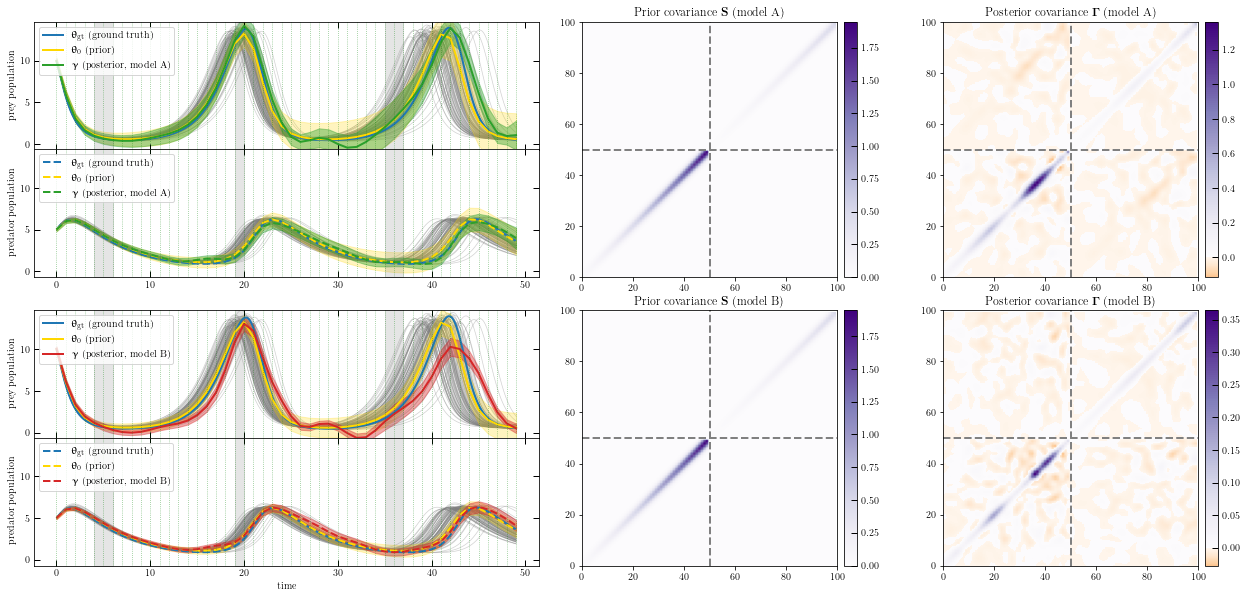

In [32]:
fig = plt.figure(figsize=(22,10))

gs0 = gridspec.GridSpec(4,3, width_ratios=[1.4,1.,1.], height_ratios=[1.,1.,1.,1.], wspace=0., hspace=0.3)
ax0a = plt.subplot(gs0[0,0])
ax0b = plt.subplot(gs0[1,0], sharex=ax0a)
ax0c = plt.subplot(gs0[2,0], sharex=ax0a)
ax0d = plt.subplot(gs0[3,0], sharex=ax0a)
ax1a = plt.subplot(gs0[0:2,1])
ax1b = plt.subplot(gs0[2:4,1], sharex=ax1a)
ax2a = plt.subplot(gs0[0:2,2])
ax2b = plt.subplot(gs0[2:4,2], sharex=ax2a)

add = 0.095
pos0a = ax0a.get_position()
pos0a_bounds = np.array(pos0a.bounds)
pos0a_bounds[1]-=add/4
pos0a_bounds[3]+=add/4

pos0b = ax0b.get_position()
pos0b_bounds = np.array(pos0b.bounds)
pos0b_bounds[3]+=add/4

pos0c = ax0c.get_position()
pos0c_bounds = np.array(pos0c.bounds)
pos0c_bounds[1]-=add/4
pos0c_bounds[3]+=add/4

pos0d = ax0d.get_position()
pos0d_bounds = np.array(pos0d.bounds)
pos0d_bounds[3]+=add/4

ax0a.set_position(Bbox.from_bounds(*pos0a_bounds))
ax0b.set_position(Bbox.from_bounds(*pos0b_bounds))
ax0c.set_position(Bbox.from_bounds(*pos0c_bounds))
ax0d.set_position(Bbox.from_bounds(*pos0d_bounds))

# Plot the expansion function, prior, and posterior
ax0a.xaxis.set_ticks_position('both')
ax0a.yaxis.set_ticks_position('both')
ax0a.xaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0a.xaxis.set_tick_params(which='major', length=6)
ax0a.xaxis.set_tick_params(which='minor', length=4)
ax0a.yaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0a.yaxis.set_tick_params(which='major', length=6)
for n in range(Nfid):
    ax0a.plot(t,Xthfid[n],ls="-",color="C7",alpha=0.35,linewidth=0.7,zorder=0.5)
ax0a.plot(t,Xtheory,ls="-",color="C0",label="$\\boldsymbol{\\uptheta}_{\mathrm{gt}}$ (ground truth)")
ax0a.plot(t_s,Xexp,ls="-",color="gold",label="$\\boldsymbol{\\uptheta}_0$ (prior)")
ax0a.fill_between(t_s,Xexp-2*sigma_tA[0:S//2],Xexp+2*sigma_tA[0:S//2],color="gold",alpha=0.25)
ax0a.plot(t_s,XpostA,ls="-",color="C2",label="$\\boldsymbol{\\upgamma}$ (posterior, model A)")
ax0a.fill_between(t_s,XpostA-2*sigma_pA[0:S//2],XpostA+2*sigma_pA[0:S//2],color="C2",alpha=0.4)
(ymin,ymax)=(ymin_ref,ymax_ref)
ax0a.set_ylim([ymin,ymax])
for i in range(len(t_s)):
    ax0a.plot([t_s[i],t_s[i]],[ymin,ymax],linestyle=':',linewidth=0.8,color='green',alpha=0.5)
for i in range(len(masks)):
    ax0a.fill_between(masks[i],np.ones_like(masks[i])*ymin,np.ones_like(masks[i])*ymax,color="C7",alpha=0.2)
ax0a.set_ylabel("prey population")
ax0a.legend(loc="upper left")

ax0b.xaxis.set_ticks_position('both')
ax0b.yaxis.set_ticks_position('both')
ax0b.xaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0b.xaxis.set_tick_params(which='major', length=6)
ax0b.xaxis.set_tick_params(which='minor', length=4)
ax0b.yaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0b.yaxis.set_tick_params(which='major', length=6)
for n in range(Nfid):
    ax0b.plot(t,Ythfid[n],ls="-",color="C7",alpha=0.35,linewidth=0.7,zorder=0.5)
ax0b.plot(t,Ytheory,ls="--",color="C0",label="$\\boldsymbol{\\uptheta}_{\mathrm{gt}}$ (ground truth)")
ax0b.plot(t_s,Yexp,ls="--",color="gold",label="$\\boldsymbol{\\uptheta}_0$ (prior)")
ax0b.fill_between(t_s,Yexp-2*sigma_tA[S//2:S],Yexp+2*sigma_tA[S//2:S],color="gold",alpha=0.25)
ax0b.plot(t_s,YpostA,ls="--",color="C2",label="$\\boldsymbol{\\upgamma}$ (posterior, model A)")
ax0b.fill_between(t_s,YpostA-2*sigma_pA[S//2:S],YpostA+2*sigma_pA[S//2:S],color="C2",alpha=0.4)
(ymin,ymax)=(ymin_ref,ymax_ref)
ax0b.set_ylim([ymin,ymax])
for i in range(len(t_s)):
    ax0b.plot([t_s[i],t_s[i]],[ymin,ymax],linestyle=':',linewidth=0.8,color='green',alpha=0.5)
for i in range(len(masks)):
    ax0b.fill_between(masks[i],np.ones_like(masks[i])*ymin,np.ones_like(masks[i])*ymax,color="C7",alpha=0.2)
# ax0b.set_xlabel("time")
ax0b.set_ylabel("predator population")
ax0b.legend(loc="upper left")

ax0c.xaxis.set_ticks_position('both')
ax0c.yaxis.set_ticks_position('both')
ax0c.xaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0c.xaxis.set_tick_params(which='major', length=6)
ax0c.xaxis.set_tick_params(which='minor', length=4)
ax0c.yaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0c.yaxis.set_tick_params(which='major', length=6)
for n in range(Nfid):
    ax0c.plot(t,Xthfid[n],ls="-",color="C7",alpha=0.35,linewidth=0.7,zorder=0.5)
ax0c.plot(t,Xtheory,ls="-",color="C0",label="$\\boldsymbol{\\uptheta}_{\mathrm{gt}}$ (ground truth)")
ax0c.plot(t_s,Xexp,ls="-",color="gold",label="$\\boldsymbol{\\uptheta}_0$ (prior)")
ax0c.fill_between(t_s,Xexp-2*sigma_tB[0:S//2],Xexp+2*sigma_tB[0:S//2],color="gold",alpha=0.25)
ax0c.plot(t_s,XpostB,ls="-",color="C3",label="$\\boldsymbol{\\upgamma}$ (posterior, model B)")
ax0c.fill_between(t_s,XpostB-2*sigma_pB[0:S//2],XpostB+2*sigma_pB[0:S//2],color="C3",alpha=0.4)
(ymin,ymax)=(ymin_ref,ymax_ref)
ax0c.set_ylim([ymin,ymax])
for i in range(len(t_s)):
    ax0c.plot([t_s[i],t_s[i]],[ymin,ymax],linestyle=':',linewidth=0.8,color='green',alpha=0.5)
for i in range(len(masks)):
    ax0c.fill_between(masks[i],np.ones_like(masks[i])*ymin,np.ones_like(masks[i])*ymax,color="C7",alpha=0.2)
ax0c.set_ylabel("prey population")
ax0c.legend(loc="upper left")

ax0d.xaxis.set_ticks_position('both')
ax0d.yaxis.set_ticks_position('both')
ax0d.xaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0d.xaxis.set_tick_params(which='major', length=6)
ax0d.xaxis.set_tick_params(which='minor', length=4)
ax0d.yaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0d.yaxis.set_tick_params(which='major', length=6)
for n in range(Nfid):
    ax0d.plot(t,Ythfid[n],ls="-",color="C7",alpha=0.35,linewidth=0.7,zorder=0.5)
ax0d.plot(t,Ytheory,ls="--",color="C0",label="$\\boldsymbol{\\uptheta}_{\mathrm{gt}}$ (ground truth)")
ax0d.plot(t_s,Yexp,ls="--",color="gold",label="$\\boldsymbol{\\uptheta}_0$ (prior)")
ax0d.fill_between(t_s,Yexp-2*sigma_tB[S//2:S],Yexp+2*sigma_tB[S//2:S],color="gold",alpha=0.25)
ax0d.plot(t_s,YpostB,ls="--",color="C3",label="$\\boldsymbol{\\upgamma}$ (posterior, model B)")
ax0d.fill_between(t_s,YpostB-2*sigma_pB[S//2:S],YpostB+2*sigma_pB[S//2:S],color="C3",alpha=0.4)
(ymin,ymax)=(ymin_ref,ymax_ref)
ax0d.set_ylim([ymin,ymax])
for i in range(len(t_s)):
    ax0d.plot([t_s[i],t_s[i]],[ymin,ymax],linestyle=':',linewidth=0.8,color='green',alpha=0.5)
for i in range(len(masks)):
    ax0d.fill_between(masks[i],np.ones_like(masks[i])*ymin,np.ones_like(masks[i])*ymax,color="C7",alpha=0.2)
ax0d.set_xlabel("time")
ax0d.set_ylabel("predator population")
ax0d.legend(loc="upper left")

# Plot the prior covariance matrix
divider = make_axes_locatable(ax1a)
ax1a_cb = divider.new_horizontal(size="5%", pad=0.10)
im1a = ax1a.imshow(SA,origin="lower",cmap="Purples")
ax1a.set_xlim([0,S])
ax1a.set_ylim([0,S])
ax1a.plot([0,S],[S//2,S//2],color='grey',linestyle='--')
ax1a.plot([S//2,S//2],[0,S],color='grey',linestyle='--')
ax1a.set_title("Prior covariance $\\textbf{S}$ (model A)")
fig.add_axes(ax1a_cb)
cbar1a = fig.colorbar(im1a, cax=ax1a_cb)
cbar1a.ax.tick_params(axis='y', direction='in', width=1.0, length=6)

divider = make_axes_locatable(ax1b)
ax1b_cb = divider.new_horizontal(size="5%", pad=0.10)
im1b = ax1b.imshow(SB,origin="lower",cmap="Purples")
ax1b.set_xlim([0,S])
ax1b.set_ylim([0,S])
ax1b.plot([0,S],[S//2,S//2],color='grey',linestyle='--')
ax1b.plot([S//2,S//2],[0,S],color='grey',linestyle='--')
ax1b.set_title("Prior covariance $\\textbf{S}$ (model B)")
fig.add_axes(ax1b_cb)
cbar1b = fig.colorbar(im1b, cax=ax1b_cb)
cbar1b.ax.tick_params(axis='y', direction='in', width=1.0, length=6)

# Plot the posterior covariance matrix
divider = make_axes_locatable(ax2a)
ax2a_cb = divider.new_horizontal(size="5%", pad=0.10)
im2a = ax2a.imshow(GammaA,origin="lower",cmap=Purples_Oranges,norm=MidpointNormalize(midpoint=0.))
ax2a.set_xlim([0,S])
ax2a.set_ylim([0,S])
ax2a.plot([0,S],[S//2,S//2],color='grey',linestyle='--')
ax2a.plot([S//2,S//2],[0,S],color='grey',linestyle='--')
ax2a.set_title("Posterior covariance $\\boldsymbol{\\Gamma}$ (model A)")
fig.add_axes(ax2a_cb)
cbar2a = fig.colorbar(im2a, cax=ax2a_cb)
cbar2a.ax.tick_params(axis='y', direction='in', width=1.0, length=6)

divider = make_axes_locatable(ax2b)
ax2b_cb = divider.new_horizontal(size="5%", pad=0.10)
im2b = ax2b.imshow(GammaB,origin="lower",cmap=Purples_Oranges,norm=MidpointNormalize(midpoint=0.))
ax2b.set_xlim([0,S])
ax2b.set_ylim([0,S])
ax2b.plot([0,S],[S//2,S//2],color='grey',linestyle='--')
ax2b.plot([S//2,S//2],[0,S],color='grey',linestyle='--')
ax2b.set_title("Posterior covariance $\\boldsymbol{\\Gamma}$ (model B)")
fig.add_axes(ax2b_cb)
cbar2b = fig.colorbar(im2b, cax=ax2b_cb)
cbar2b.ax.tick_params(axis='y', direction='in', width=1.0, length=6)

plt.show()

In [33]:
np.savez("plots/selfi",t=t,t_s=t_s,Nfid=Nfid,S=S,ymin_ref=ymin_ref,ymax_ref=ymax_ref,masks=np.array(masks, dtype=object),
        Xthfid=Xthfid,Xtheory=Xtheory,Xexp=Xexp,XpostA=XpostA,XpostB=XpostB,
        Ythfid=Ythfid,Ytheory=Ytheory,Yexp=Yexp,YpostA=YpostA,YpostB=YpostB,
        sigma_tA=sigma_tA,sigma_pA=sigma_pA,sigma_tB=sigma_tB,sigma_pB=sigma_pB,
        SA=SA,SB=SB,GammaA=GammaA,GammaB=GammaB)

In [34]:
Mahalanobis_0 = selfi_LV_modelA.Mahalanobis_ms_check()
Mahalanobis_1 = selfi_LV_modelB.Mahalanobis_ms_check()
Mahalanobis_fid = np.array([selfi_LV_modelA.Mahalanobis_ms_check(theta_fid[i]) for i in range(Nfid)])
Mahalanobis_0, Mahalanobis_1, Mahalanobis_fid.mean(), Mahalanobis_fid.std()

(5.348737343074428, 12.540133569205997, 9.429092837938185, 4.8568986136730485)

# Score compression

In [35]:
# Measure the gradient of f_0 with respect to \omega at the expansion point
Delta_omega = 1e-3
selfi_LV_modelA.compute_grad_f_omega(t, t_s, tres, Delta_omega)
grad_theta = selfi_LV_modelA.grad_theta
grad_f_omega = selfi_LV_modelA.grad_f_omega

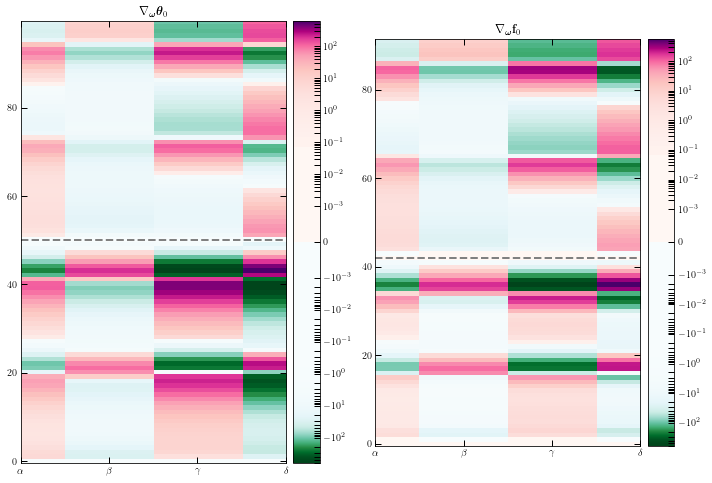

In [36]:
fig = plt.figure(2, (10, 7))

grid0 = ImageGrid(fig, 121, nrows_ncols = (1, 1), axes_pad=0.1, cbar_size="10%", cbar_mode='single')
ax0 = grid0[0]
ax0.xaxis.set_ticks_position('both')
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0.xaxis.set_tick_params(which='major', length=6)
ax0.xaxis.set_tick_params(which='minor', length=4)
ax0.yaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0.yaxis.set_tick_params(which='major', length=6)
ax0.yaxis.set_tick_params(which='minor', length=4)
ax0.set_xlim([0,3])
ax0.set_xticks([0,1,2,3])
ax0.set_xticklabels(["$\\alpha$","$\\beta$","$\\gamma$","$\\delta$"])
ax0.plot([0,4],[S//2,S//2],color='grey',linestyle='--')
im0 = ax0.imshow(grad_theta,origin="lower",cmap=GradientMap,norm=MidpointSymLogNorm(midpoint=0.,
                                            linthresh=1e-3, linscale=1, vmin=grad_theta.min(), vmax=grad_theta.max()), aspect=0.05)
ax0.set_title("$\\nabla_{\\boldsymbol{\\omega}} \\boldsymbol{\\theta}_0$")
cax0 = grid0.cbar_axes[0]
cbar0 = fig.colorbar(im0, cax=cax0)
cbar0.ax.tick_params(axis='y', direction='in', width=1.0, length=6)

grid1 = ImageGrid(fig, 122, nrows_ncols = (1, 1), axes_pad=0.1, cbar_size="10%", cbar_mode='single')
ax1 = grid1[0]
ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_tick_params(which='both', direction='in', width=1.0)
ax1.xaxis.set_tick_params(which='major', length=6)
ax1.xaxis.set_tick_params(which='minor', length=4)
ax1.yaxis.set_tick_params(which='both', direction='in', width=1.0)
ax1.yaxis.set_tick_params(which='major', length=6)
ax1.yaxis.set_tick_params(which='minor', length=4)
ax1.set_xlim([0,3])
ax1.set_xticks([0,1,2,3])
ax1.set_xticklabels(["$\\alpha$","$\\beta$","$\\gamma$","$\\delta$"])
ax1.plot([0,4],[PX,PX],color='grey',linestyle='--')
im1 = ax1.imshow(grad_f_omega,origin="lower",cmap=GradientMap,norm=MidpointSymLogNorm(midpoint=0.,
                                            linthresh=1e-3, linscale=1, vmin=grad_f_omega.min(), vmax=grad_f_omega.max()), aspect=0.05)
ax1.set_title("$\\nabla_{\\boldsymbol{\\omega}} \\textbf{f}_0$")
cax1 = grid1.cbar_axes[0]
cbar1 = fig.colorbar(im1, cax=cax1)
cbar1.ax.tick_params(axis='y', direction='in', width=1.0, length=6)

fig.tight_layout()

In [37]:
%%capture
grad_f_omega_direct = selfi_LV_modelA.compute_grad_f_omega_direct(t, t_s, tres, Delta_omega, fdir+"pools_LV_modelA_gradients/pool_", Ne)

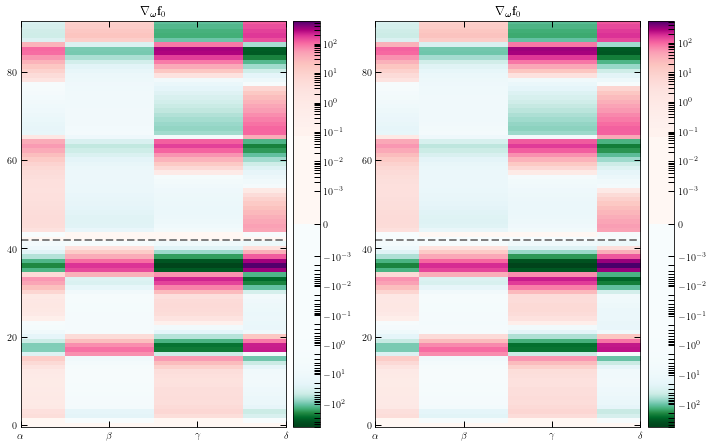

In [38]:
fig = plt.figure(2, (10, 7))

grid0 = ImageGrid(fig, 121, nrows_ncols = (1, 1), axes_pad=0.1, cbar_size="10%", cbar_mode='single')
ax0 = grid0[0]
ax0.xaxis.set_ticks_position('both')
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0.xaxis.set_tick_params(which='major', length=6)
ax0.xaxis.set_tick_params(which='minor', length=4)
ax0.yaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0.yaxis.set_tick_params(which='major', length=6)
ax0.yaxis.set_tick_params(which='minor', length=4)
ax0.set_xlim([0,3])
ax0.set_xticks([0,1,2,3])
ax0.set_xticklabels(["$\\alpha$","$\\beta$","$\\gamma$","$\\delta$"])
ax0.plot([0,4],[PX,PX],color='grey',linestyle='--')
im0 = ax0.imshow(grad_f_omega,origin="lower",cmap=GradientMap,norm=MidpointSymLogNorm(midpoint=0.,
                                            linthresh=1e-3, linscale=1, vmin=grad_theta.min(), vmax=grad_theta.max()), aspect=0.05)
ax0.set_title("$\\nabla_{\\boldsymbol{\\omega}} \\textbf{f}_0$")
cax0 = grid0.cbar_axes[0]
cbar0 = fig.colorbar(im0, cax=cax0)
cbar0.ax.tick_params(axis='y', direction='in', width=1.0, length=6)

grid1 = ImageGrid(fig, 122, nrows_ncols = (1, 1), axes_pad=0.1, cbar_size="10%", cbar_mode='single')
ax1 = grid1[0]
ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_tick_params(which='both', direction='in', width=1.0)
ax1.xaxis.set_tick_params(which='major', length=6)
ax1.xaxis.set_tick_params(which='minor', length=4)
ax1.yaxis.set_tick_params(which='both', direction='in', width=1.0)
ax1.yaxis.set_tick_params(which='major', length=6)
ax1.yaxis.set_tick_params(which='minor', length=4)
ax1.set_xlim([0,3])
ax1.set_xticks([0,1,2,3])
ax1.set_xticklabels(["$\\alpha$","$\\beta$","$\\gamma$","$\\delta$"])
ax1.plot([0,4],[PX,PX],color='grey',linestyle='--')
im1 = ax1.imshow(grad_f_omega_direct,origin="lower",cmap=GradientMap,norm=MidpointSymLogNorm(midpoint=0.,
                                            linthresh=1e-3, linscale=1, vmin=grad_f_omega_direct.min(), vmax=grad_f_omega_direct.max()), aspect=0.05)
ax1.set_title("$\\nabla_{\\boldsymbol{\\omega}} \\textbf{f}_0$")
cax1 = grid1.cbar_axes[0]
cbar1 = fig.colorbar(im1, cax=cax1)
cbar1.ax.tick_params(axis='y', direction='in', width=1.0, length=6)

fig.tight_layout()

[19:12:26|STATUS    ]|Writing data compression information in data file '/home/leclercq/codes/pyselfi/pyselfi_examples/lotkavolterra/sims/selfi_LV_modelA.h5'...
[19:12:26|STATUS    ]|Writing data compression information in data file '/home/leclercq/codes/pyselfi/pyselfi_examples/lotkavolterra/sims/selfi_LV_modelA.h5' done.


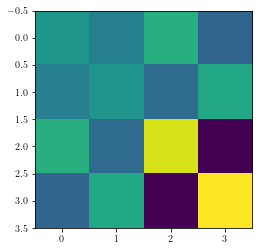

In [39]:
selfi_LV_modelA.compute_Fisher_matrix()
F_0 = selfi_LV_modelA.F_0
invF_0 = selfi_LV_modelA.invF_0
selfi_LV_modelA.save()
plt.imshow(F_0)

In [40]:
omega_tilde = selfi_LV_modelA.score_compression(phi_obs)
phi_obs2 = bbA.make_data(theta_true)
omega_tilde2 = selfi_LV_modelA.score_compression(phi_obs2)
Fdist = selfi_LV_modelA.FisherRao_distance(omega_tilde, omega_tilde2)
Edist = np.sqrt((omega_tilde-omega_tilde2).dot(omega_tilde-omega_tilde2))
print(omega_tilde, omega_tilde2)
print(Fdist, Edist)

[0.70503559 0.22871117 0.14711977 0.0414676 ] [0.43932098 0.17119967 0.23885589 0.05902992]
3.0314584183013173 0.2874643895317651
